In [1]:
import sys
sys.path.append('/Users/jankirschbaum/Documents/GitHub/py-utils')
sys.path.append('/Users/jankirschbaum/Documents/GitHub/D2/py-pde')
sys.path.append('../py-phasesep')

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import phasesep
import pde

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [29]:
# set some global constants used in most simulations
kappa = 1  # interfacial term
mobility = 1  # general diffusive mobility of all species

In [36]:
# determine free energy density 
chis = np.zeros((2, 2))
iB, iC= range(2)
chis[iB, iC] = 6  # chi_BS => B repells from solvent

sizes = [1, 1]  # molecular sizes of the components
slopes = [0.5, 0]  #  internal engeries

f1 = phasesep.FloryHugginsNComponents(2, chis=chis, sizes=sizes, slopes=slopes, variables=['B', 'C'])
f1.expression

Using symmetrized χ interaction-matrix


'B * log(B) + (1 - B) * log(1 - B) + 3 * B * (1 - B) + 0.5 * B'

In [31]:
eq1 = phasesep.CahnHilliardMultiplePDE({'free_energy': f1, 'kappa': kappa, 'kappa_from_chis': True,
                                        'mobility': mobility})

kappa: [[0. 3.]
 [3. 0.]]
mobility: [[1.]]


In [32]:
# set the geometry
limitr = 200
res = 1
resolutionr = res*limitr
grid = pde.SphericalGrid(limitr,resolutionr)
coords = grid.axes_coords[0]

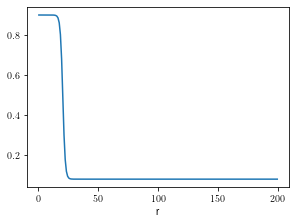

[0.08090431413258015]


In [55]:
def InitDrop(rad,a_,b_,w_,Nr):
    r_ = np.zeros(Nr)
    for i in range(Nr):
        r_[i] = (a_ - b_) * (1. + np.tanh((rad - i)/w_)) / 2. + b_
    return r_

pB = pde.ScalarField.random_uniform(grid, 0.01, 0.2)
pB.data = InitDrop(limitr * 0.1 * res,0.9,0.08,2,resolutionr)
state = pde.FieldCollection([pB])

In [81]:
t_range = 40000

result = eq1.solve(state, t_range=t_range, dt=0.001, tracker=['progress'])

/Users/jankirschbaum/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:526: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


In [82]:
cp = eq1.chemical_potential(result)
coords = grid.axes_coords[0]
np.savetxt('mu.txt',cp.data[0])
np.savetxt('phi.txt',result.data[0])
np.savetxt('r.txt',coords)